In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
import os
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris

from math import sqrt

from scipy.stats import norm,binom,poisson,shapiro,bernoulli


# Statistics

In [3]:
# define and set random state
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
N_SAMPLE =5000
CMAP = plt.cm.rainbow
#plt.rcParams.update(params)
plt.set_cmap(CMAP)

#plt.style.use('seaborn-darkgrid')

TESTSIZE=0.24




<Figure size 640x480 with 0 Axes>

In [4]:
def fn_gen_data(n_sample=50, dist='uniform',random_var=0):
    if dist == 'uniform':
        d=np.random.random(size=n_sample)

    if dist == 'normal':
        d=np.random.normal(loc=1-random_var, scale=1+random_var, size=n_sample) 

    if dist == 'binomial':
        d=np.random.binomial(n=10,p=0.5+random_var/10,size=n_sample)

    if dist == 'exponential':
        d=np.random.exponential(scale=0.5+random_var,size=n_sample) 

    if dist == 'poisson':
        d=np.random.poisson(lam=1.0+random_var,size=n_sample)   

    if dist == 'laplace':
        d=np.random.laplace(loc=0.0,scale=1.0,size=n_sample)   

    d = d+np.abs(d.min())
    d=d/(d.max()-d.min())

    return d

In [5]:
def fn_plot_data(data, binwidth=0.1,title='uniform'):
    sns.histplot(data, kde=True, binwidth=binwidth, binrange=(0,1),kde_kws={'bw_adjust':1.5},element='step')

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'{title.title()} Distribution')
    plt.grid(True)

    plt.show()

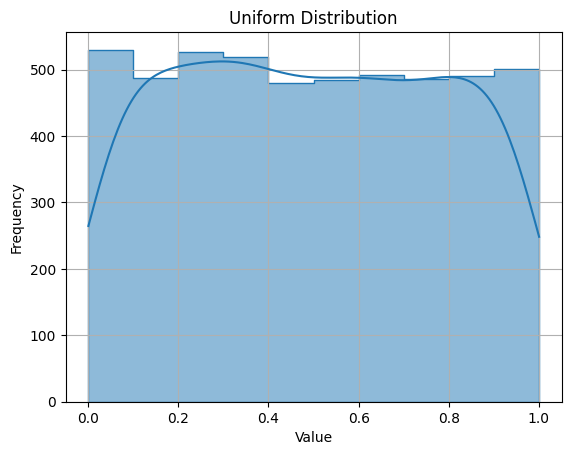

In [6]:
dist_type = 'uniform'
data_uniform = fn_gen_data(n_sample=N_SAMPLE,dist=dist_type,random_var=0)

fn_plot_data(data_uniform, title=dist_type)

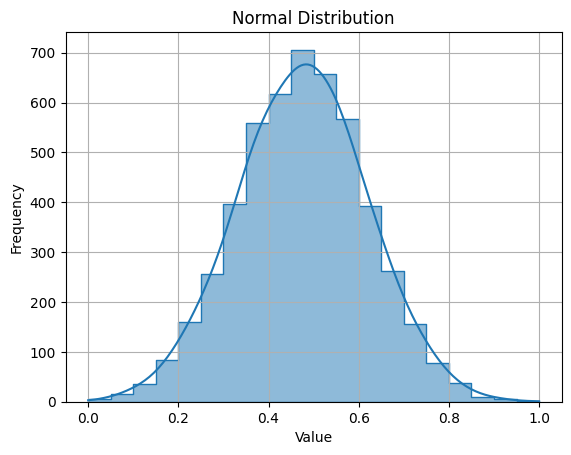

In [7]:
dist_type = 'normal'
data = fn_gen_data(n_sample=N_SAMPLE,dist=dist_type,random_var=0)

fn_plot_data(data,0.05,title=dist_type)

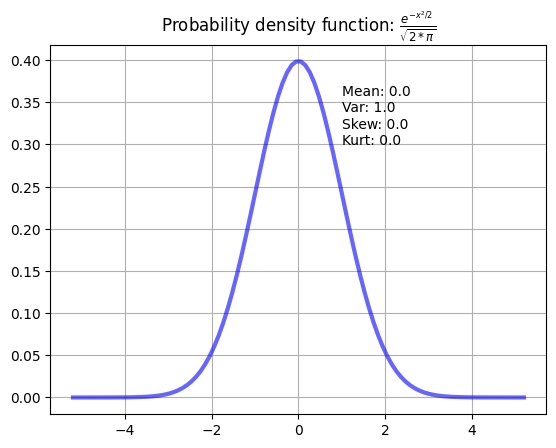

In [8]:
mean, var ,skew, kurt = norm.stats(moments='mvsk')

eps = 1e-7

x = np.linspace(norm.ppf(eps),norm.ppf(1-eps),100)

plt.plot(x, norm.pdf(x), 'b-', lw=3, alpha=0.6, label='norm.pdf')

plt.title("Probability density function: $\\frac{e^{-x^2/2}}{\sqrt{2 * \pi}}$",fontsize=12)

plt.text(1,0.3,f"Mean: {mean}\nVar: {var}\nSkew: {skew}\nKurt: {kurt}")

plt.grid(True)
plt.show()

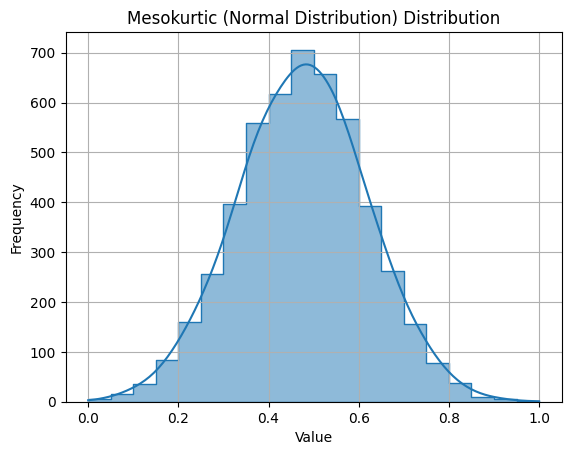

In [9]:
fn_plot_data(data, 0.05, title="Mesokurtic (Normal Distribution)")


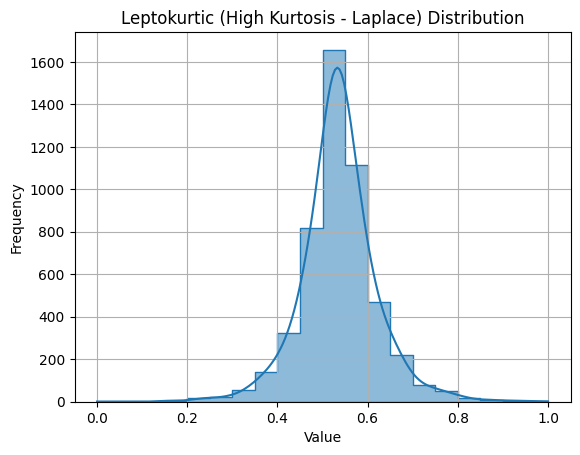

In [13]:
dist_type = 'laplace'
data_leptokurtic = fn_gen_data(n_sample=N_SAMPLE,dist=dist_type,random_var=0)

fn_plot_data(data_leptokurtic,0.05,title="Leptokurtic (High Kurtosis - Laplace)")

In [14]:
# Perform the Shapiro-Wilk Test
stat, p_value = shapiro(data)

print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p_value}')

# Interpreting the result
alpha = 0.05
if p_value > alpha:
    print("The sample looks normally distributed (fail to reject H0)")
else:
    print("The sample does not look normally distributed (reject H0)")


Shapiro-Wilk Test Statistic: 0.9997612299493445, P-value: 0.8734067500794205
The sample looks normally distributed (fail to reject H0)


In [15]:
# Fair Coin
# p=0.5 i.e. fair coin
bernoulli.rvs(p=0.5,size=10)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [20]:
pr=0.5 # Fair coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')

print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

Mean: 0.5
Variance: 0.25
Skew: 0.0
Kurtosis: -2.0


In [27]:
pr=[0.5,0.6,0.7,0.8,0.9]
n=5
print("Mean, Variance, Skew, Kurtosis:")
for c in pr:
    mean, var, skew, kurt = bernoulli.stats(p=c, moments='mvsk')

    print(f"{mean.round(n)}....{var.round(n)}....{skew.round(n)}....{kurt.round(n)}")


Mean, Variance, Skew, Kurtosis:
0.5....0.25....0.0....-2.0
0.6....0.24....-0.40825....-1.83333
0.7....0.21....-0.87287....-1.2381
0.8....0.16....-1.5....0.25
0.9....0.09....-2.66667....5.11111


......

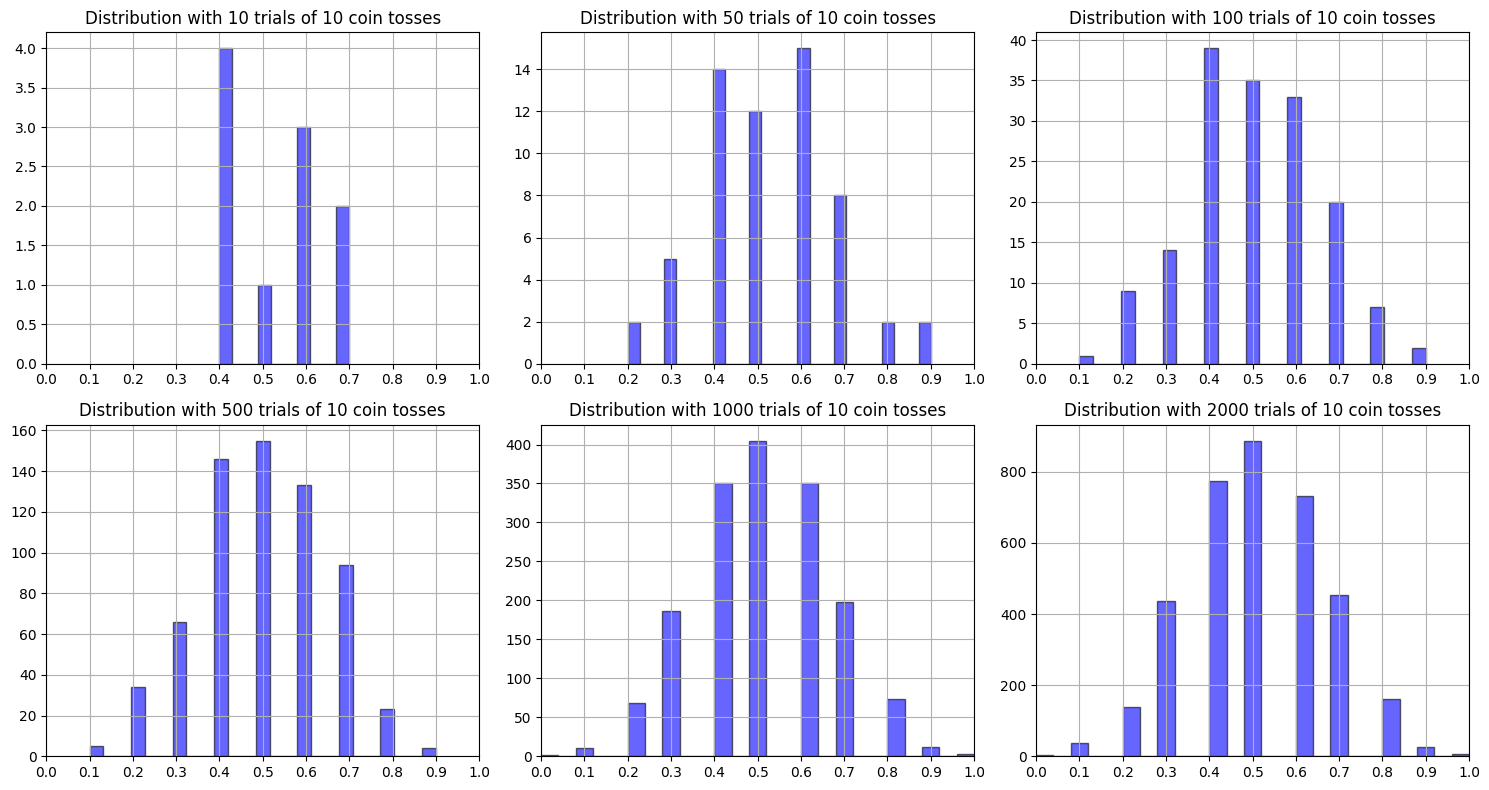

In [32]:
num_trials = [10, 50, 100, 500, 1000, 2000] # Number of trials
pr=0.5 # Fair coin toss probability
av = [] # Empty list to store the average of the random variates

fig, axes = plt.subplots(2,3, figsize = (15,8))
axes = axes.ravel()


for count, nTrials in enumerate(num_trials):
    print ('.', end='') 
    ax = axes[count]
    bins = 25
    if nTrials == 10:
        bins = 10
        
    for n in range(1,nTrials+1):
        # Generate 10 variates every time and take the average. 
        # That should be # of 1's i.e. 0.5 for a fair coin.
        av.append(np.mean(bernoulli.rvs(p=pr,size=10))) 
    
    ax.set_title("Distribution with {} trials of 10 coin tosses".format(nTrials))
    ax.hist(av,bins=bins,edgecolor='k',color='b', alpha=0.6)
    ax.set_xlim(0.0,1.0)
    ax.set_xticks([0.1*i for i in range(11)])
    ax.grid(True)
plt.tight_layout()
plt.show()

In [33]:
n = 3
p = 0.5
k=1

probability = binom.pmf(k,n,p)
print(f"The probability of finding exactly {k} defective bulbs out of {n} is: {probability:.4f}")

The probability of finding exactly 1 defective bulbs out of 3 is: 0.3750


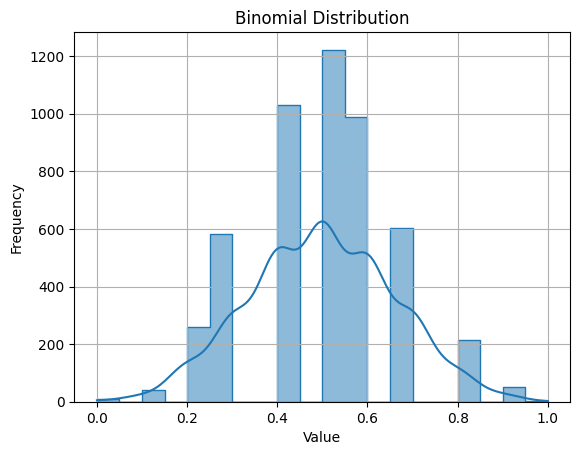

In [34]:
dist_type='binomial'

data = fn_gen_data(n_sample=N_SAMPLE,dist=dist_type,random_var=0)

fn_plot_data(data,0.05,title=dist_type)

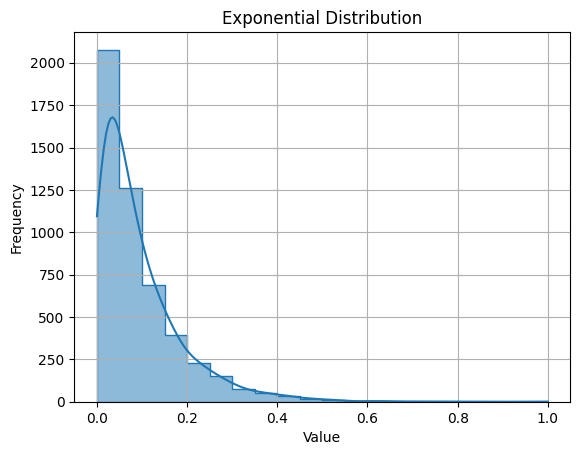

In [35]:
dist_type='exponential'

data = fn_gen_data(n_sample=N_SAMPLE,dist=dist_type,random_var=0)

fn_plot_data(data,0.05,title=dist_type)

In [36]:
lambda_value =3
k=5
probability = poisson.pmf(k,lambda_value)
probability

np.float64(0.10081881344492458)

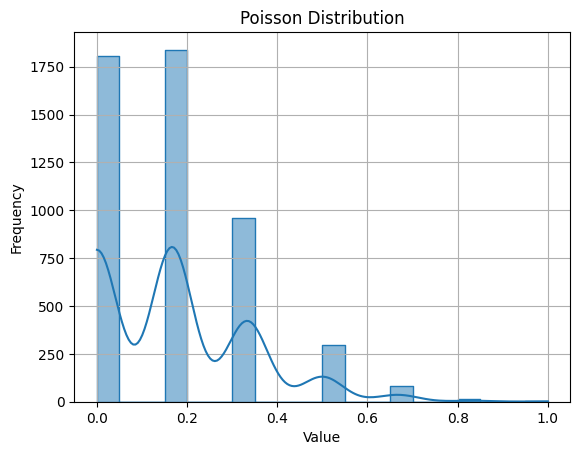

In [37]:
dist_type = 'poisson'

data = fn_gen_data(n_sample=N_SAMPLE,dist=dist_type,random_var=0)

fn_plot_data(data,0.05,title=dist_type)

In [38]:
# Example data: Probability of passing based on study hours
data = {
    'Study Hours': ['Low', 'Low', 'High', 'High'],
    'Pass Exam': [0, 1, 0, 1],
    'Frequency': [3, 7, 2, 8]
}
df = pd.DataFrame(data)

# Joint Probability: P(High Study Hours and Pass Exam)
joint_prob = df[(df['Study Hours'] == 'High') & (df['Pass Exam'] == 1)]['Frequency'].sum() / df['Frequency'].sum()
print(f"Joint Probability of High Study Hours and Passing: {joint_prob:.2f}")

# Conditional Probability: P(Pass Exam | High Study Hours)
conditional_prob = joint_prob / (df[df['Study Hours'] == 'High']['Frequency'].sum() / df['Frequency'].sum()) 
print(f"Conditional Probability of Passing given High Study Hours: {conditional_prob:.2f}") 

Joint Probability of High Study Hours and Passing: 0.40
Conditional Probability of Passing given High Study Hours: 0.80
